<a href="https://colab.research.google.com/github/Jessica0100/data/blob/main/data_tugas13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Langkah 1: Import library yang dibutuhkan
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

In [2]:
data = {
    "PanjangKelopak": [1.4, 1.5, 1.3, 4.5, 4.1, 4.7, 5.1, 5.3, 5.0, 4.6, 1.6, 5.2, 1.4, 4.3, 5.1],
  # Langkah 2: Membuat dataset (15 data, 2 fitur, 3 kelas)
  "LebarKelopak":   [0.2, 0.1, 0.2, 1.5, 1.3, 1.4, 1.9, 2.0, 1.8, 1.5, 0.3, 2.0, 0.2, 1.3, 1.9],
    "Kelas":          ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'B', 'A', 'C', 'A', 'B', 'C']
}
df = pd.DataFrame(data)

In [3]:
# Langkah 3: Mengubah label kelas menjadi angka
# Mapping: A=0, B=1, C=2
label_mapping = {'A': 0, 'B': 1, 'C': 2}
df['Label'] = df['Kelas'].map(label_mapping)


In [4]:
# Langkah 4: Pisahkan fitur dan target
X = df[['PanjangKelopak', 'LebarKelopak']]
y = df['Label']

In [5]:
# Langkah 5: Buat model Decision Tree menggunakan entropy (Information Gain)
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [6]:
# Langkah 6: Tampilkan pohon dalam bentuk teks (rule/rules)
tree_text = export_text(model, feature_names=['PanjangKelopak', 'LebarKelopak'])
print("===ATURAN POHON KEPUTUSAN===")
print(tree_text)

===ATURAN POHON KEPUTUSAN===
|--- PanjangKelopak <= 2.85
|   |--- class: 0
|--- PanjangKelopak >  2.85
|   |--- LebarKelopak <= 1.65
|   |   |--- class: 1
|   |--- LebarKelopak >  1.65
|   |   |--- class: 2



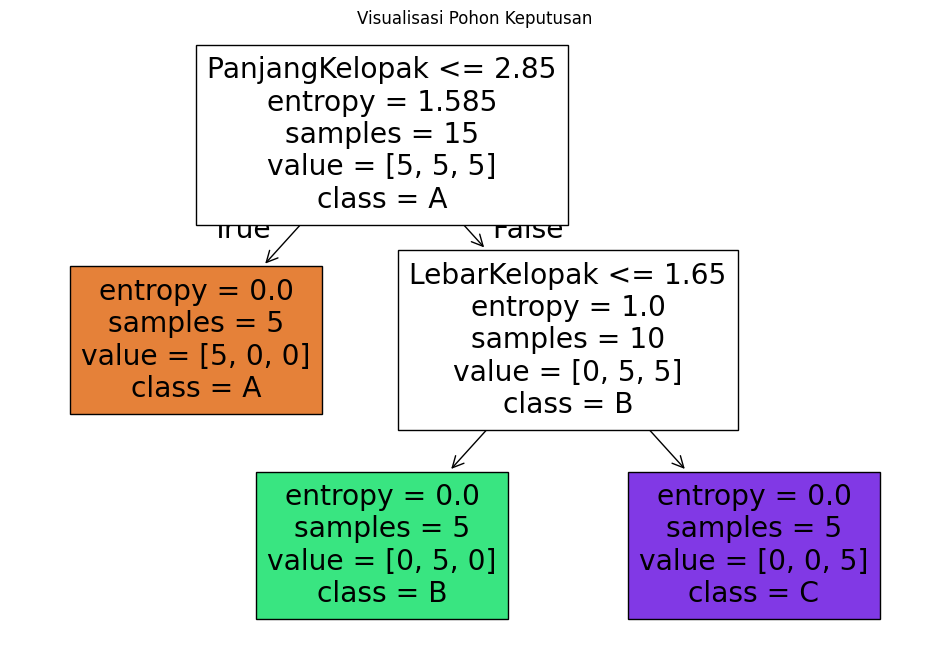

In [7]:
# Langkah 7: Visualisasikan pohon keputusan
plt.figure(figsize=(12, 8))
plot_tree(
    model,
    filled=True,
    feature_names=['PanjangKelopak', 'LebarKelopak'],
    class_names=['A', 'B', 'C']
)
plt.title("Visualisasi Pohon Keputusan")
plt.show()

In [8]:
# Langkah 8: Uji 2 data baru
data_baru = pd.DataFrame({
    "PanjangKelopak": [1.5, 5.2],
    "LebarKelopak": [0.2, 2.0]
})

In [9]:
# Prediksi kelasnya
prediksi_label = model.predict(data_baru)


In [10]:
# Konversi kembali ke label A, B, C
prediksi_kelas = [list(label_mapping.keys())[list(label_mapping.values()).index(i)] for i in prediksi_label]
data_baru["Prediksi_Kelas"] = prediksi_kelas

print("\n HASIL PREDIKSI UNTUK 2 DATA BARU ")
print(data_baru)


 HASIL PREDIKSI UNTUK 2 DATA BARU 
   PanjangKelopak  LebarKelopak Prediksi_Kelas
0             1.5           0.2              A
1             5.2           2.0              C
